# Per country analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
stat = pd.read_csv("data/covid_19_data.csv.zip", low_memory=False)

In [4]:
stat.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
stat.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
mostrecent = stat[stat.ObservationDate == stat.ObservationDate.max()]

In [7]:
mostrecent.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
20251,20252,05/01/2020,NaN,Afghanistan,2020-05-02 02:32:27,2335.0,68.0,310.0
20252,20253,05/01/2020,NaN,Albania,2020-05-02 02:32:27,782.0,31.0,488.0
20253,20254,05/01/2020,NaN,Algeria,2020-05-02 02:32:27,4154.0,453.0,1821.0
20254,20255,05/01/2020,NaN,Andorra,2020-05-02 02:32:27,745.0,43.0,468.0
20255,20256,05/01/2020,NaN,Angola,2020-05-02 02:32:27,30.0,2.0,11.0


In [8]:
outcomes = mostrecent.groupby('Country/Region')['Country/Region', 'Confirmed', 'Deaths', 'Recovered'].sum()

In [9]:
outcomes.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,2335.0,68.0,310.0
Albania,782.0,31.0,488.0
Algeria,4154.0,453.0,1821.0
Andorra,745.0,43.0,468.0
Angola,30.0,2.0,11.0


## Top countries by active/death/recovered/death rate

In [10]:
outcomes['DeathRate'] = outcomes[outcomes['Deaths'] > 100]['Deaths']/outcomes[outcomes['Deaths'] > 100]['Confirmed'] * 100

In [11]:
outcomes.head()

,Confirmed,Deaths,Recovered,DeathRate
Country/Region,,,,
Afghanistan,2335.0,68.0,310.0,NaN
Albania,782.0,31.0,488.0,NaN
Algeria,4154.0,453.0,1821.0,10.905152
Andorra,745.0,43.0,468.0,NaN
Angola,30.0,2.0,11.0,NaN


In [12]:
deathrate_top = outcomes.sort_values('DeathRate', ascending = False).head(15).sort_values(by = 'DeathRate')

In [13]:
deathrate_top

,Confirmed,Deaths,Recovered,DeathRate
Country/Region,,,,
Iran,95646.0,6091.0,76318.0,6.368275
Philippines,8772.0,579.0,1084.0,6.600547
Egypt,5895.0,406.0,1460.0,6.887193
Brazil,92202.0,6412.0,38039.0,6.954296
Indonesia,10551.0,800.0,1591.0,7.582220
Mexico,20739.0,1972.0,12377.0,9.508655
Algeria,4154.0,453.0,1821.0,10.905152
Hungary,2863.0,323.0,609.0,11.281872
Spain,213435.0,24543.0,112050.0,11.499051


In [14]:
outcomes['Active'] = outcomes['Confirmed'] - outcomes['Recovered'] - outcomes['Deaths']

In [15]:
active_top = outcomes.sort_values(by='Active', ascending = False).head(15).sort_values(by = 'Active')

In [19]:
active_top

,Confirmed,Deaths,Recovered,DeathRate,Active
Country/Region,,,,,
US,1103461.0,64943.0,164015.0,5.885392,939446.0
UK,178685.0,27583.0,892.0,15.436662,177793.0
Italy,207428.0,28236.0,78249.0,13.612434,129179.0
France,167305.0,24628.0,51124.0,14.720421,116181.0
Spain,213435.0,24543.0,112050.0,11.499051,101385.0
Russia,114431.0,1169.0,13220.0,1.021576,101211.0
Turkey,122392.0,3258.0,53808.0,2.661939,68584.0
Brazil,92202.0,6412.0,38039.0,6.954296,54163.0
Netherlands,39989.0,4909.0,138.0,12.275876,39851.0


In [32]:
recovered_top =  outcomes.sort_values(by='Recovered', ascending = False).head(15).sort_values(by = 'Recovered')
confirmed_top =  outcomes.sort_values(by='Confirmed', ascending = False).head(15).sort_values(by = 'Confirmed')

In [38]:
def plot_cell(top, label, x, y):
    labels = top.index.to_series()
    l = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    rect = ax[x,y].barh(l, top[label].values, width, label=label)
    
    ax[x,y].set_title(label + ' cases',fontsize=18)
    ax[x,y].set_yticks(l)
    ax[x,y].set_yticklabels(labels)


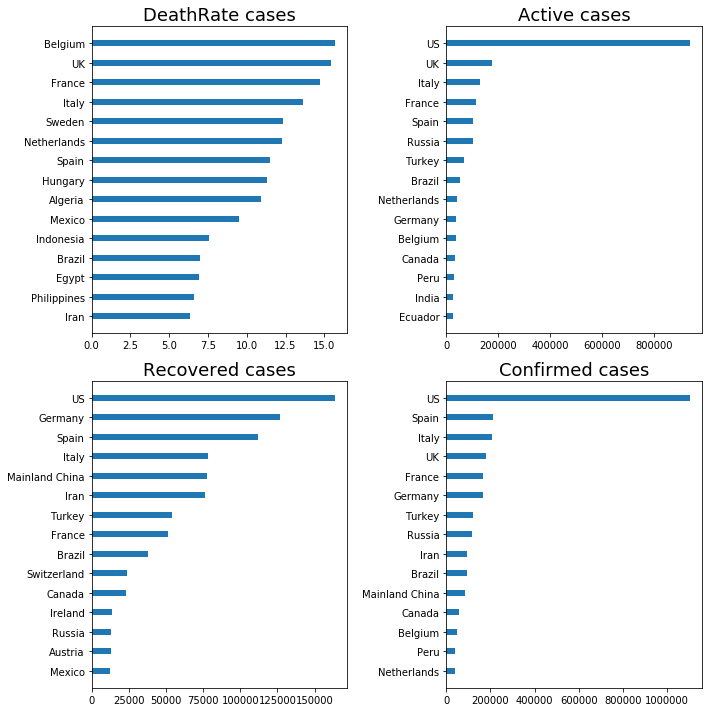

In [39]:
%matplotlib inline 

fig, ax = plt.subplots(figsize=(10, 10), ncols=2, nrows=2)

plot_cell(deathrate_top, 'DeathRate', 0, 0)
plot_cell(active_top, 'Active', 0, 1)
plot_cell(recovered_top, 'Recovered', 1, 0)
plot_cell(confirmed_top, 'Confirmed', 1, 1)

fig.tight_layout()


plt.show()

## Recovered vs deaths for Russia, US, Germany

In [40]:
stat[['ObservationDate', 'Deaths', 'Recovered']].head()

,ObservationDate,Deaths,Recovered
0,01/22/2020,0.0,0.0
1,01/22/2020,0.0,0.0
2,01/22/2020,0.0,0.0
3,01/22/2020,0.0,0.0
4,01/22/2020,0.0,0.0


In [71]:
stat_country = stat.groupby(['ObservationDate', 'Country/Region'])['ObservationDate', 'Deaths', 'Recovered'].sum()

In [83]:
stat_country.reset_index(level=0, inplace=True)
stat_country.reset_index(level=0, inplace=True)
#stat_country.index = pd.to_datetime(stat_country.index)

In [92]:
def plot_country(country):
    plt.figure(figsize=(15,5))

    data = stat_country[stat_country['ObservationDate'] > '02/20/2020'][stat_country['Country/Region'] == country]
    plt.plot(data['ObservationDate'], data['Deaths']
        , label = 'Death cases'
        , color = '#ff3300'     
        , marker = 'o')
    
    plt.plot(data['ObservationDate'], data['Recovered']
        , label = 'Recovered cases'
        , color = '#00e600'
        , marker = 'o')
    
    plt.title('Death vs recovered cases over the time in ' + country, size=30)
    plt.ylabel('Cases',size=20)
    plt.xlabel('Timeline',size=20)
    plt.xticks(rotation=45,size=15)
    plt.yticks(size=15)

    plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

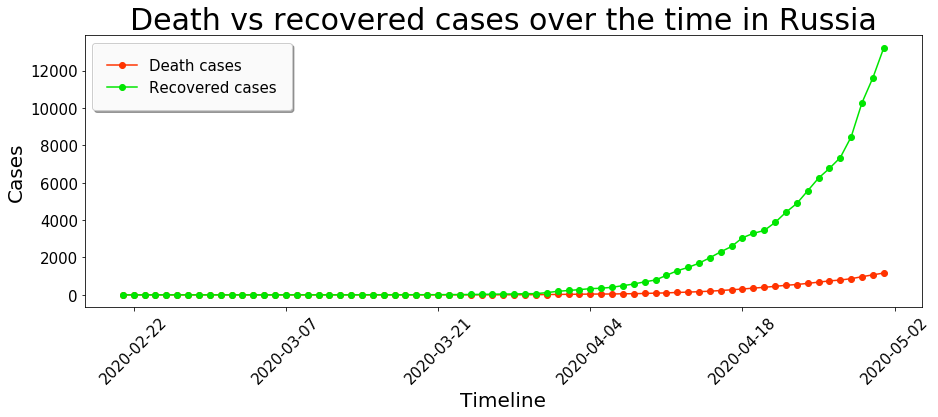

In [93]:
plot_country('Russia')

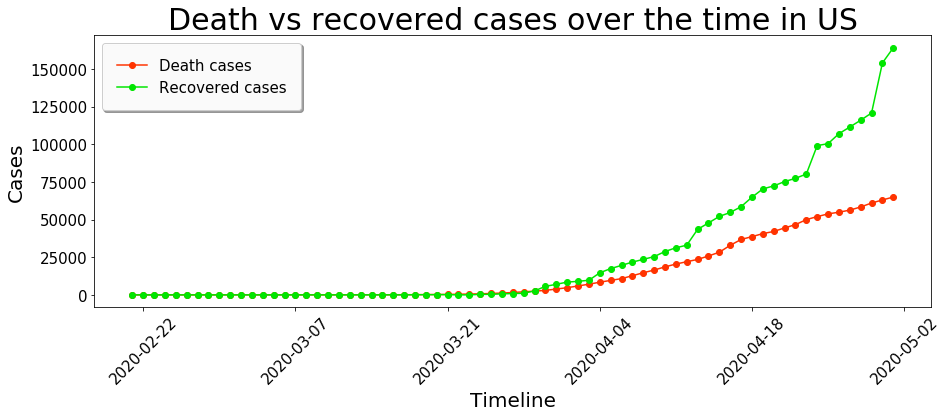

In [94]:
plot_country('US')

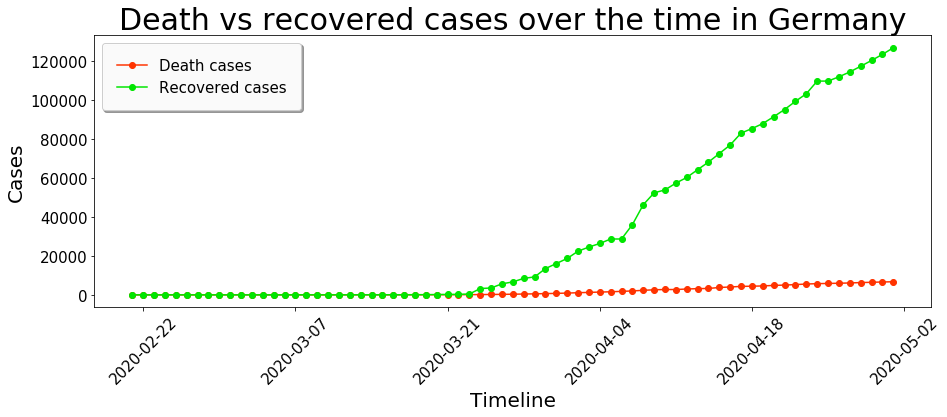

In [95]:
plot_country('Germany')

# Detailed case analysis

In [17]:
cases = pd.read_csv("data/COVID19_open_line_list.csv", low_memory=False)

## Chronic diseases vs deaths

In [18]:
cases.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude',
       'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials',
       'travel_history_binary'],
      dtype='object')

In [20]:
cases[['outcome', 'chronic_disease', 'chronic_disease_binary']].dropna().count()

outcome                   124
chronic_disease           124
chronic_disease_binary    124
dtype: int64

In [99]:
cases['outcome'].unique()

array(['critical condition, intubated as of 14.02.2020', 'death',
       'discharge', nan, 'discharged', 'Discharged',
       'Discharged from hospital', 'not hospitalized', 'recovered',
       'recovering at home 03.03.2020', 'released from quarantine',
       'severe', 'stable', 'dead', 'died',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Under treatment',
       'Critical condition', 'Receiving Treatment', 'Deceased',
       'stable condition', 'severe illness', 'unstable',
       'critical condition',
       'https://twitter.com/airnewsalerts/status/1239796624928444416?s=19',
       'https://arogya.maharashtra.gov.in/1175/Novel--Corona-Virus',
       'https://www.livemint.com/news/india/kerala-reports-14-new-corona-cases-state-tally-at-105-11585058837568.html',
       'https://twitter.com/PTI_News/status/1243579676976701440?s=19',
  

In [21]:
death_cases = cases[cases['outcome'].isin(
    ['Died', 'died', 'death', 'Died', 'Dead', 'Deceased', 'deceased', 'severe', 
     'severe illness', 'critical contdition', 'Critical condition'])]

In [22]:
death_cases[death_cases['chronic_disease_binary'] == True]['ID'].count()

104

In [23]:
death_cases[death_cases['chronic_disease_binary'] == False]['ID'].count()

115

In [103]:
death_cases[death_cases['chronic_disease_binary'] == True]['chronic_disease'].unique()

array(['diabetes, hypertension',
       '"thought to have had other pre-existing conditions"',
       'hepatitis B, diabetes', 'hypertension, diabetes',
       'chronic bronchitis', 'diabetes', 'hypertension',
       'coronary heart disease', 'diabetes, coronary heart disease',
       'hypertension, coronary heart disease, diabetes, Tuberculosis',
       'hypertension, chronic obstructive pulmonary disease, diabetes, chronic renal insufficiency',
       'diabetes, cerebral infarction',
       'hypertension, diabetes, coronary heart disease, frequent ventricular premature beat (FVPB), coronary artery stenting',
       'hypertension, cerebral infarction, encephalomalacia',
       'hypertension, hip replacement',
       "Parkinson's disease for five years, taking medicine of Madopar",
       "hypertension for more than 20 years, diabetes for more than 20 years, Parkinson's disease",
       'hypertension, diabetes, colon cancer surgery four years ago',
       'chronic bronchitis, stenocard

In [104]:
import re 

all_diseases = dict()

def parse_diseases(row):
    if pd.isna(row['chronic_disease']) or pd.isnull(row['chronic_disease']):
        return
    diseases = re.split(',|;|and|:', str(row['chronic_disease']))
    
    for disease in diseases:
        if re.match('([A-Za-z ]+)', disease):  
            match = re.search('([A-Za-z ]+)', disease, re.IGNORECASE)
            all_diseases[match.group(1).lower().strip()] = [0]
            
tmp = death_cases.apply(lambda row: parse_diseases(row), axis=1)

In [105]:
all_diseases

{'asthma': [0],
 'atherosclerosis': [0],
 'atrial fibrillation': [0],
 'benign prostatic hyperplasia': [0],
 'benign prostatic hypertrophy': [0],
 'bronchial asthma': [0],
 'cardiac disease': [0],
 'cardiac dysrhythmia': [0],
 'cardiomyopathy': [0],
 'cardiovascular disease': [0],
 'cerebral infarction': [0],
 'cerebrovascular accident infarct': [0],
 'cerebrovascular infarct': [0],
 'chronic bronchitis': [0],
 'chronic kidney disease': [0],
 'chronic obstructive pulmonary disease': [0],
 'chronic renal insufficiency': [0],
 'colon cancer': [0],
 'colon cancer surgery four years ago': [0],
 'coronary artery disease': [0],
 'coronary artery stenting': [0],
 'coronary heart disease': [0],
 'coronary stenting': [0],
 'diabetes': [0],
 'diabetes for more than': [0],
 'dislipidemia': [0],
 'dyslipidemia': [0],
 'encephalomalacia': [0],
 'frequent ventricular premature beat': [0],
 'hemorrhage of digestive tract': [0],
 'hepatitis b': [0],
 'hip replacement': [0],
 'hypertension': [0],
 'hyp

In [106]:
dis_cols = list(all_diseases)
dis_data = dict(all_diseases)

df_diseases = pd.DataFrame(columns = dis_cols)
pattern = re.compile('([A-Za-z ]+)', re.IGNORECASE)

def create_case_with_diseases(row):
    if pd.isna(row['chronic_disease']) or pd.isnull(row['chronic_disease']):
        return
    
    global df_diseases
    global pattern
    global all_diseases
    diseases = re.split(',|;|and', str(row['chronic_disease']))
    new_row = pd.DataFrame(columns=dis_cols, data=dis_data)
    
    for disease in diseases:
        if pattern.match(disease):  
            match = re.search(pattern, disease)
            disease = match.group(1).lower().strip()
            if disease in all_diseases:
                new_row[disease] = [1]
                
    df_diseases = df_diseases.append(new_row)            
    return new_row
                
df1 = death_cases.apply(create_case_with_diseases, axis=1)

In [107]:
df_diseases

,diabetes,hypertension,hepatitis b,chronic bronchitis,coronary heart disease,tuberculosis,chronic obstructive pulmonary disease,chronic renal insufficiency,cerebral infarction,frequent ventricular premature beat,...,cardiac disease,hypothyroidism,dyslipidemia,prostate cancer,tongue cancer,cardiovascular disease,benign prostatic hypertrophy,cardiac dysrhythmia,hyperthyroidism,cerebrovascular accident infarct
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df_diseases.sum()

diabetes                                 30.0
hypertension                             55.0
hepatitis b                               2.0
chronic bronchitis                        3.0
coronary heart disease                    4.0
tuberculosis                              1.0
chronic obstructive pulmonary disease     4.0
chronic renal insufficiency               1.0
cerebral infarction                       2.0
frequent ventricular premature beat       1.0
coronary artery stenting                  1.0
encephalomalacia                          1.0
hip replacement                           1.0
parkinson                                 2.0
taking medicine of madopar                1.0
hypertension for more than                1.0
diabetes for more than                    1.0
colon cancer surgery four years ago       1.0
stenocardia                               1.0
coronary stenting                         1.0
hemorrhage of digestive tract             1.0
chronic kidney disease            